# EDA Analysis for Spotify Dataset

## Instructions

1) Upload Spotify dataset data to BQ
Use basic BigQuery functions to understand data characteristics:
_MIN(), MAX(), AVG(), STDDEV(), VARIANCE(), COUNT(), COUNTIF(), CORR(), APPROX_QUANTILES(), PERCENTILE_CONT()_

2) (Optional) Apply a BQ script (loop function), to produce the results for all columns

3) Create a dashboard in Datastudio with the results

4) (Optional) Use Jupyter notebook and standard libraries to analyze the data and generate graphs
Create a slide on Jamboard with the results and conclusions to comment on.

## Solution

## Install and import Libraries

In [5]:
!pip install plotly
!pip install yellowbrick
!pip install seaborn
!pip install --upgrade scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
import plotly.express as px 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})

## Let's load data directly from BigQuery, using magic bigquery functions

In [14]:
%%bigquery df

SELECT
  acousticness,
  danceability,
  duration_ms,
  energy,
  explicit,
  instrumentalness,
  key,
  liveness,
  loudness,
  mode,
  popularity,
  release_date,
  speechiness,
  tempo,
  valence,
  year
FROM
  `qwiklabs-gcp-01-c539b0a4f60e.test.spotify_dataset`;

TypeError: Client.query() got an unexpected keyword argument 'sql'

## Inspect the data

In [4]:
# show first 5 rows
df.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.941         0.241       196307   0.274         0   
1         0.996         0.518       159507   0.203         0   
2         0.992         0.522       170627   0.290         0   
3         0.597         0.508       124787   0.500         0   
4         0.995         0.514       172133   0.256         0   

   instrumentalness  key  liveness  loudness  mode  popularity release_date  \
0          0.000008    0    0.0984    -9.750     0           2         1921   
1          0.000000    0    0.1150   -10.589     1           5         1921   
2          0.000000    0    0.3810   -12.194     0           0         1921   
3          0.000004    0    0.2540    -7.805     1           0         1921   
4          0.000000    0    0.3490   -15.145     1           0         1921   

   speechiness    tempo  valence  year  
0       0.0297   90.773    0.212  1921  
1       0.0615   66.221    0.406  1921  
2       0.0522   92.707    0.651  1921  
3       0.0345  127.969    0.275  1921  
4       0.0871   79.467    0.574  1921

Let's check for the null values

In [5]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

count           mean            std     min          25%  \
acousticness      169909.0       0.493214       0.376627     0.0       0.0945   
danceability      169909.0       0.538150       0.175346     0.0       0.4170   
duration_ms       169909.0  231406.158973  121321.923219  5108.0  171040.0000   
energy            169909.0       0.488593       0.267390     0.0       0.2630   
explicit          169909.0       0.084863       0.278679     0.0       0.0000   
instrumentalness  169909.0       0.161937       0.309329     0.0       0.0000   
key               169909.0       5.200519       3.515257     0.0       2.0000   
liveness          169909.0       0.206690       0.176796     0.0       0.0984   
loudness          169909.0     -11.370289       5.666765   -60.0     -14.4700   
mode              169909.0       0.708556       0.454429     0.0       0.0000   
popularity        169909.0      31.556610      21.582614     0.0      12.0000   
speechiness       169909.0       0.094058       0.149937     0.0       0.0349   
tempo             169909.0     116.948017      30.726937     0.0      93.5160   
valence           169909.0       0.532095       0.262408     0.0       0.3220   
year              169909.0    1977.223231      25.593168  1921.0    1957.0000   

                            50%          75%          max  
acousticness           0.492000       0.8880        0.996  
danceability           0.548000       0.6670        0.988  
duration_ms       208600.000000  262960.0000  5403500.000  
energy                 0.481000       0.7100        1.000  
explicit               0.000000       0.0000        1.000  
instrumentalness       0.000204       0.0868        1.000  
key                    5.000000       8.0000       11.000  
liveness               0.135000       0.2630        1.000  
loudness             -10.474000      -7.1180        3.855  
mode                   1.000000       1.0000        1.000  
popularity            33.000000      48.0000      100.000  
speechiness            0.045000       0.0754        0.969  
tempo                114.778000     135.7120      244.091  
valence                0.544000       0.7490        1.000  
year                1978.000000    1999.0000     2020.000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   danceability      169909 non-null  float64
 2   duration_ms       169909 non-null  Int64  
 3   energy            169909 non-null  float64
 4   explicit          169909 non-null  Int64  
 5   instrumentalness  169909 non-null  float64
 6   key               169909 non-null  Int64  
 7   liveness          169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   mode              169909 non-null  Int64  
 10  popularity        169909 non-null  Int64  
 11  release_date      169909 non-null  object 
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  year              169909 non-null  Int64  
dtypes: Int64(6), float64

## Histograms

<AxesSubplot:xlabel='popularity', ylabel='Count'>

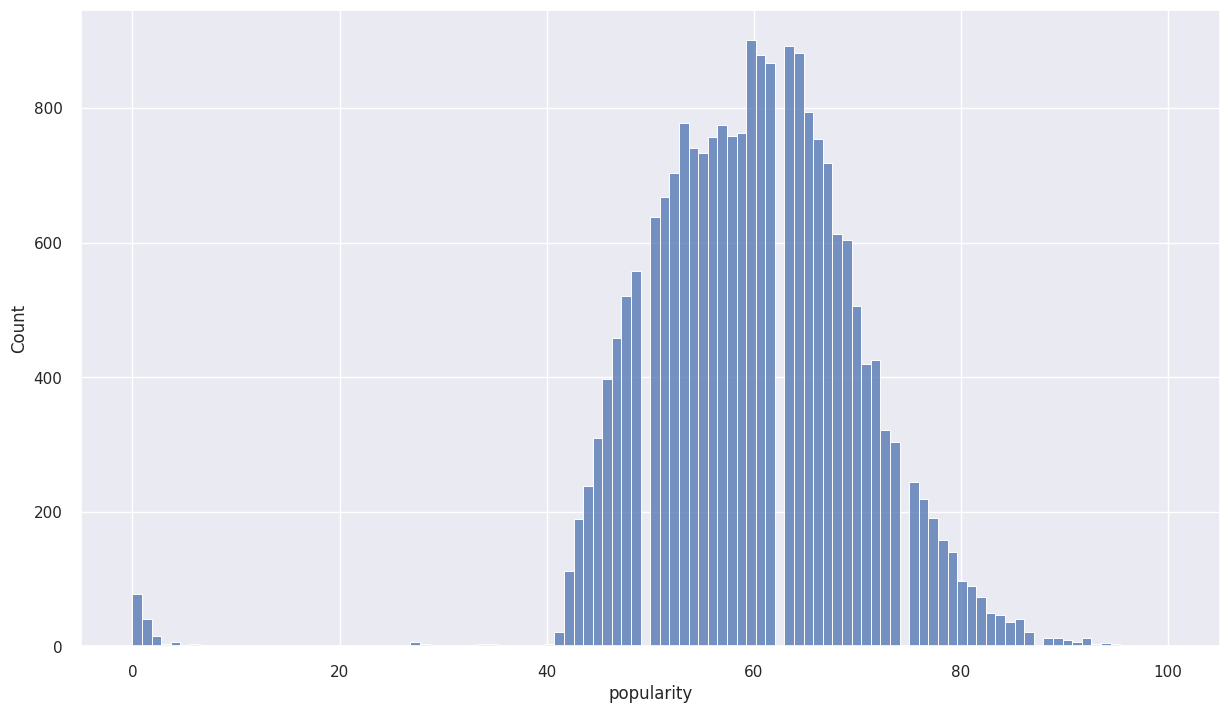

In [8]:
df_filtered = df.loc[df['year'] > 2010]

sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.histplot(df_filtered['popularity'], kde=False)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

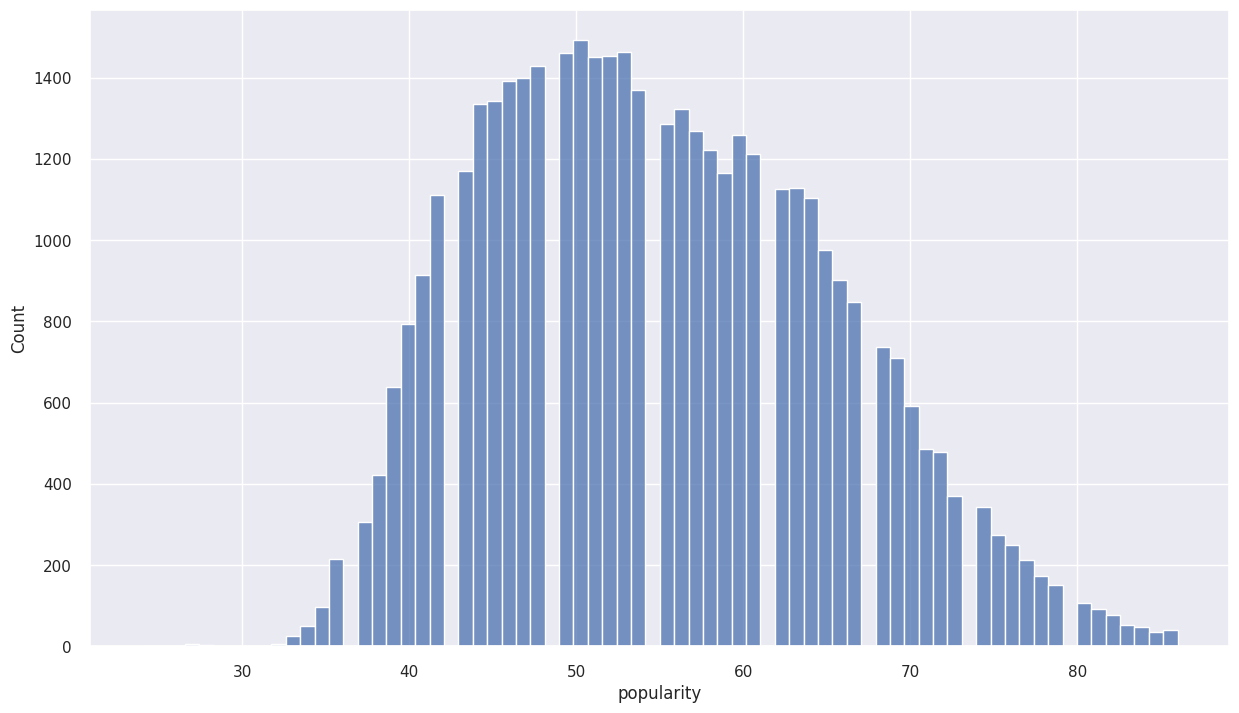

In [9]:
from scipy import stats
numeric_features = df.select_dtypes(np.number)
numeric_features_filtered = numeric_features.loc[(numeric_features['year'] >= 2000) & (numeric_features['popularity'] > 0)]
numeric_features_filtered['popularity']
np.abs(stats.zscore(np.array(numeric_features_filtered['popularity'], dtype=np.float64)))

numeric_features_with_no_outliers = numeric_features_filtered[(np.abs(stats.zscore(np.array(numeric_features_filtered['popularity'], dtype=np.float64))) < 3)]

sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.histplot(numeric_features_with_no_outliers['popularity'], kde=False)

In [10]:
df_filtered = df.loc[(df['year'] > 2018) & (df['year'] < 2020)]
df_filtered = df.loc[df['year'] > 2017]

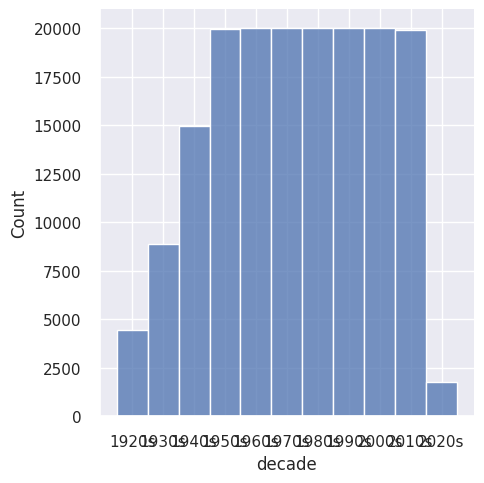

In [24]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

# sns.set(rc={'figure.figsize':(11 ,6)})
sns.displot(df['decade'])

## Correlation between features

<AxesSubplot:>

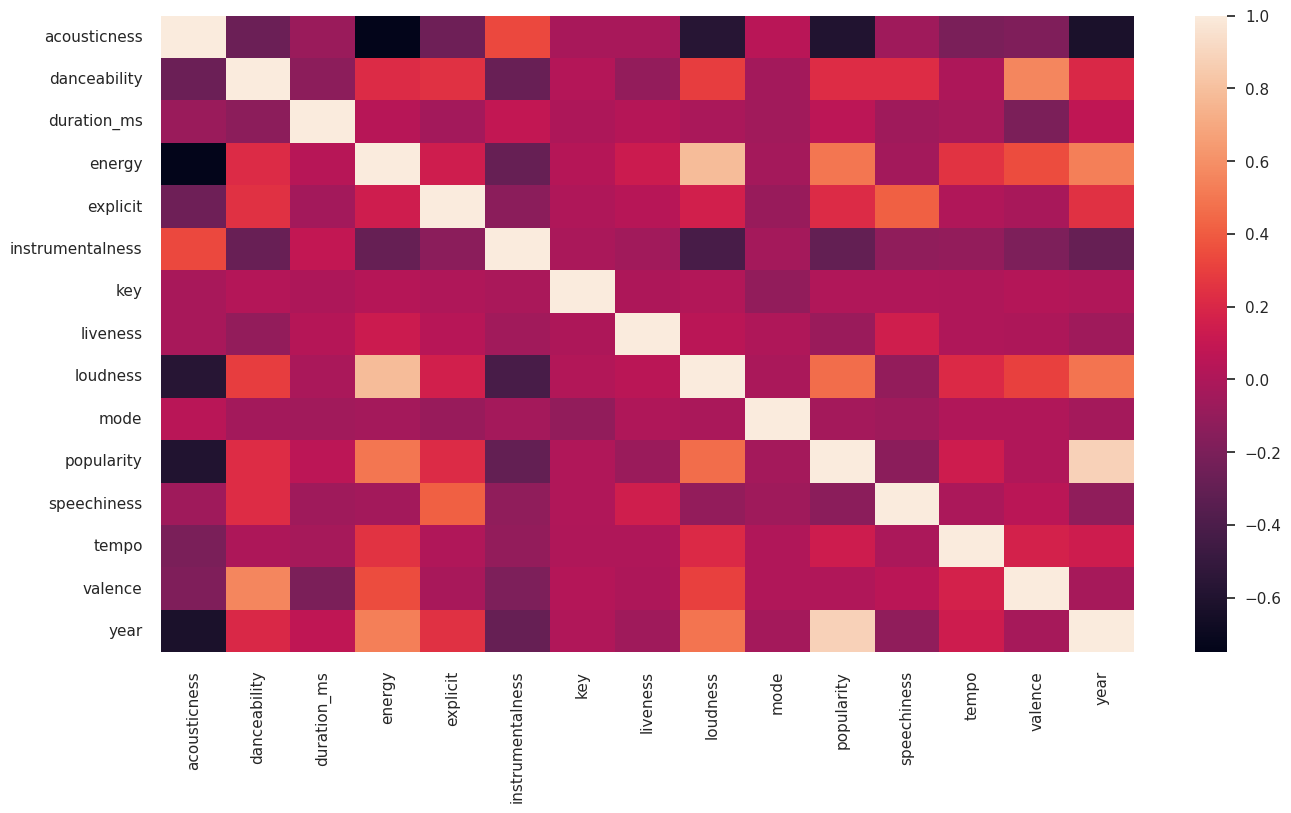

In [25]:
sns.heatmap(df.corr())

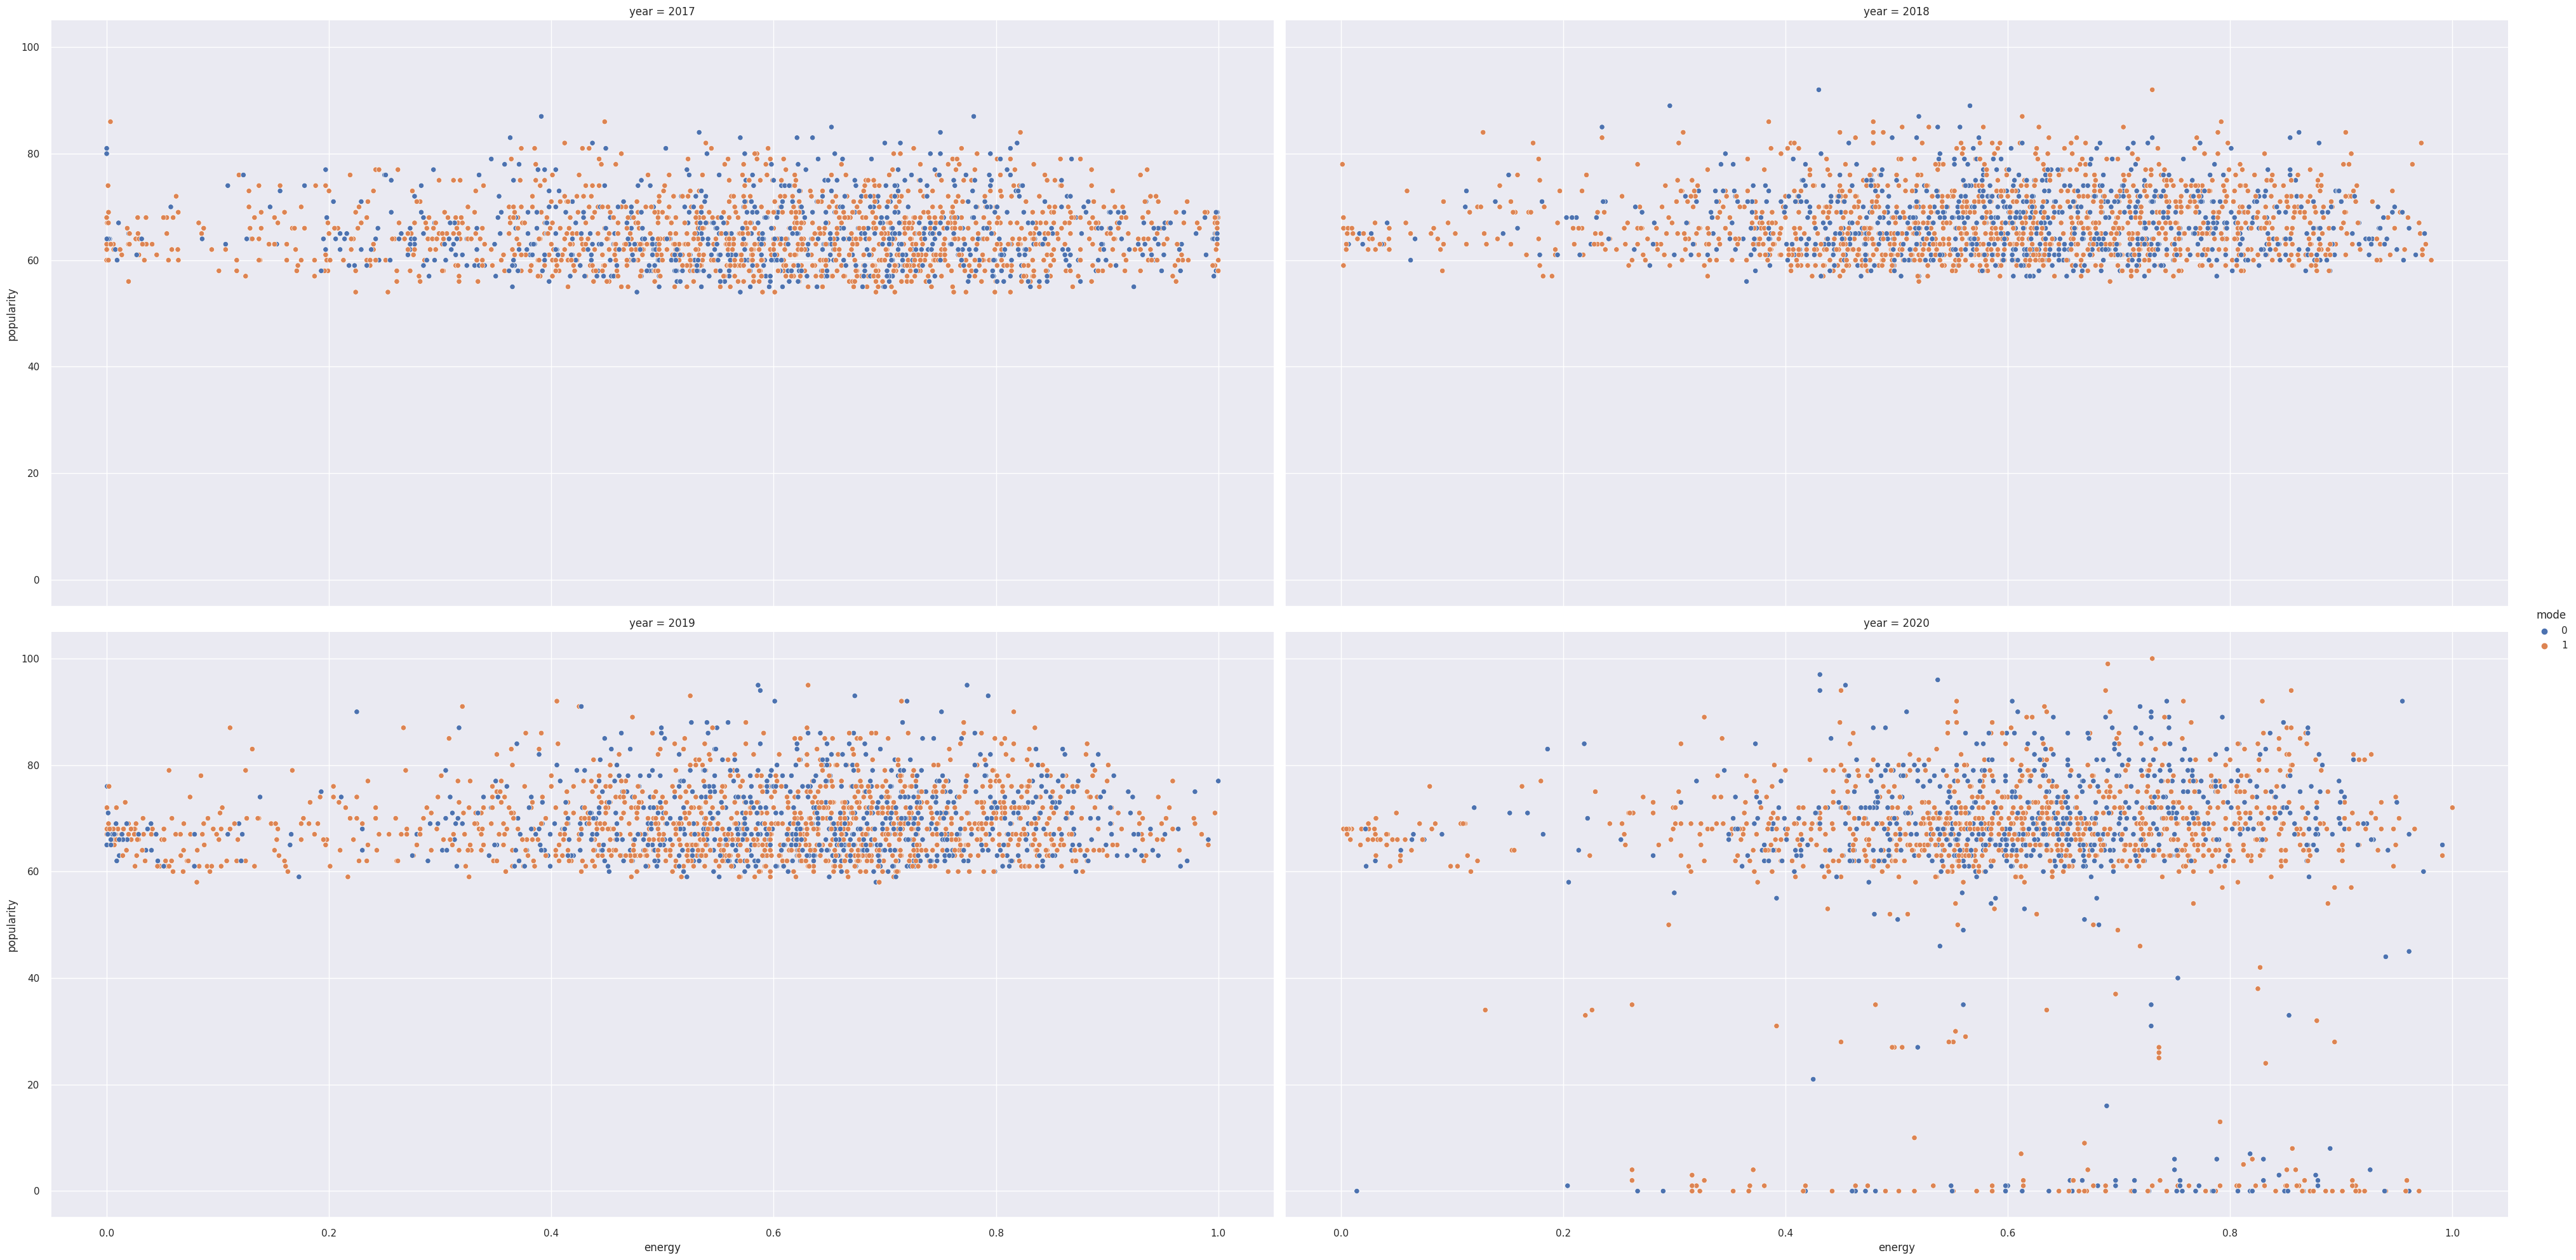

In [26]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.relplot(data=df_filtered, x='energy', y='popularity', height=10, aspect=2, hue='mode', col='year', col_wrap=2)

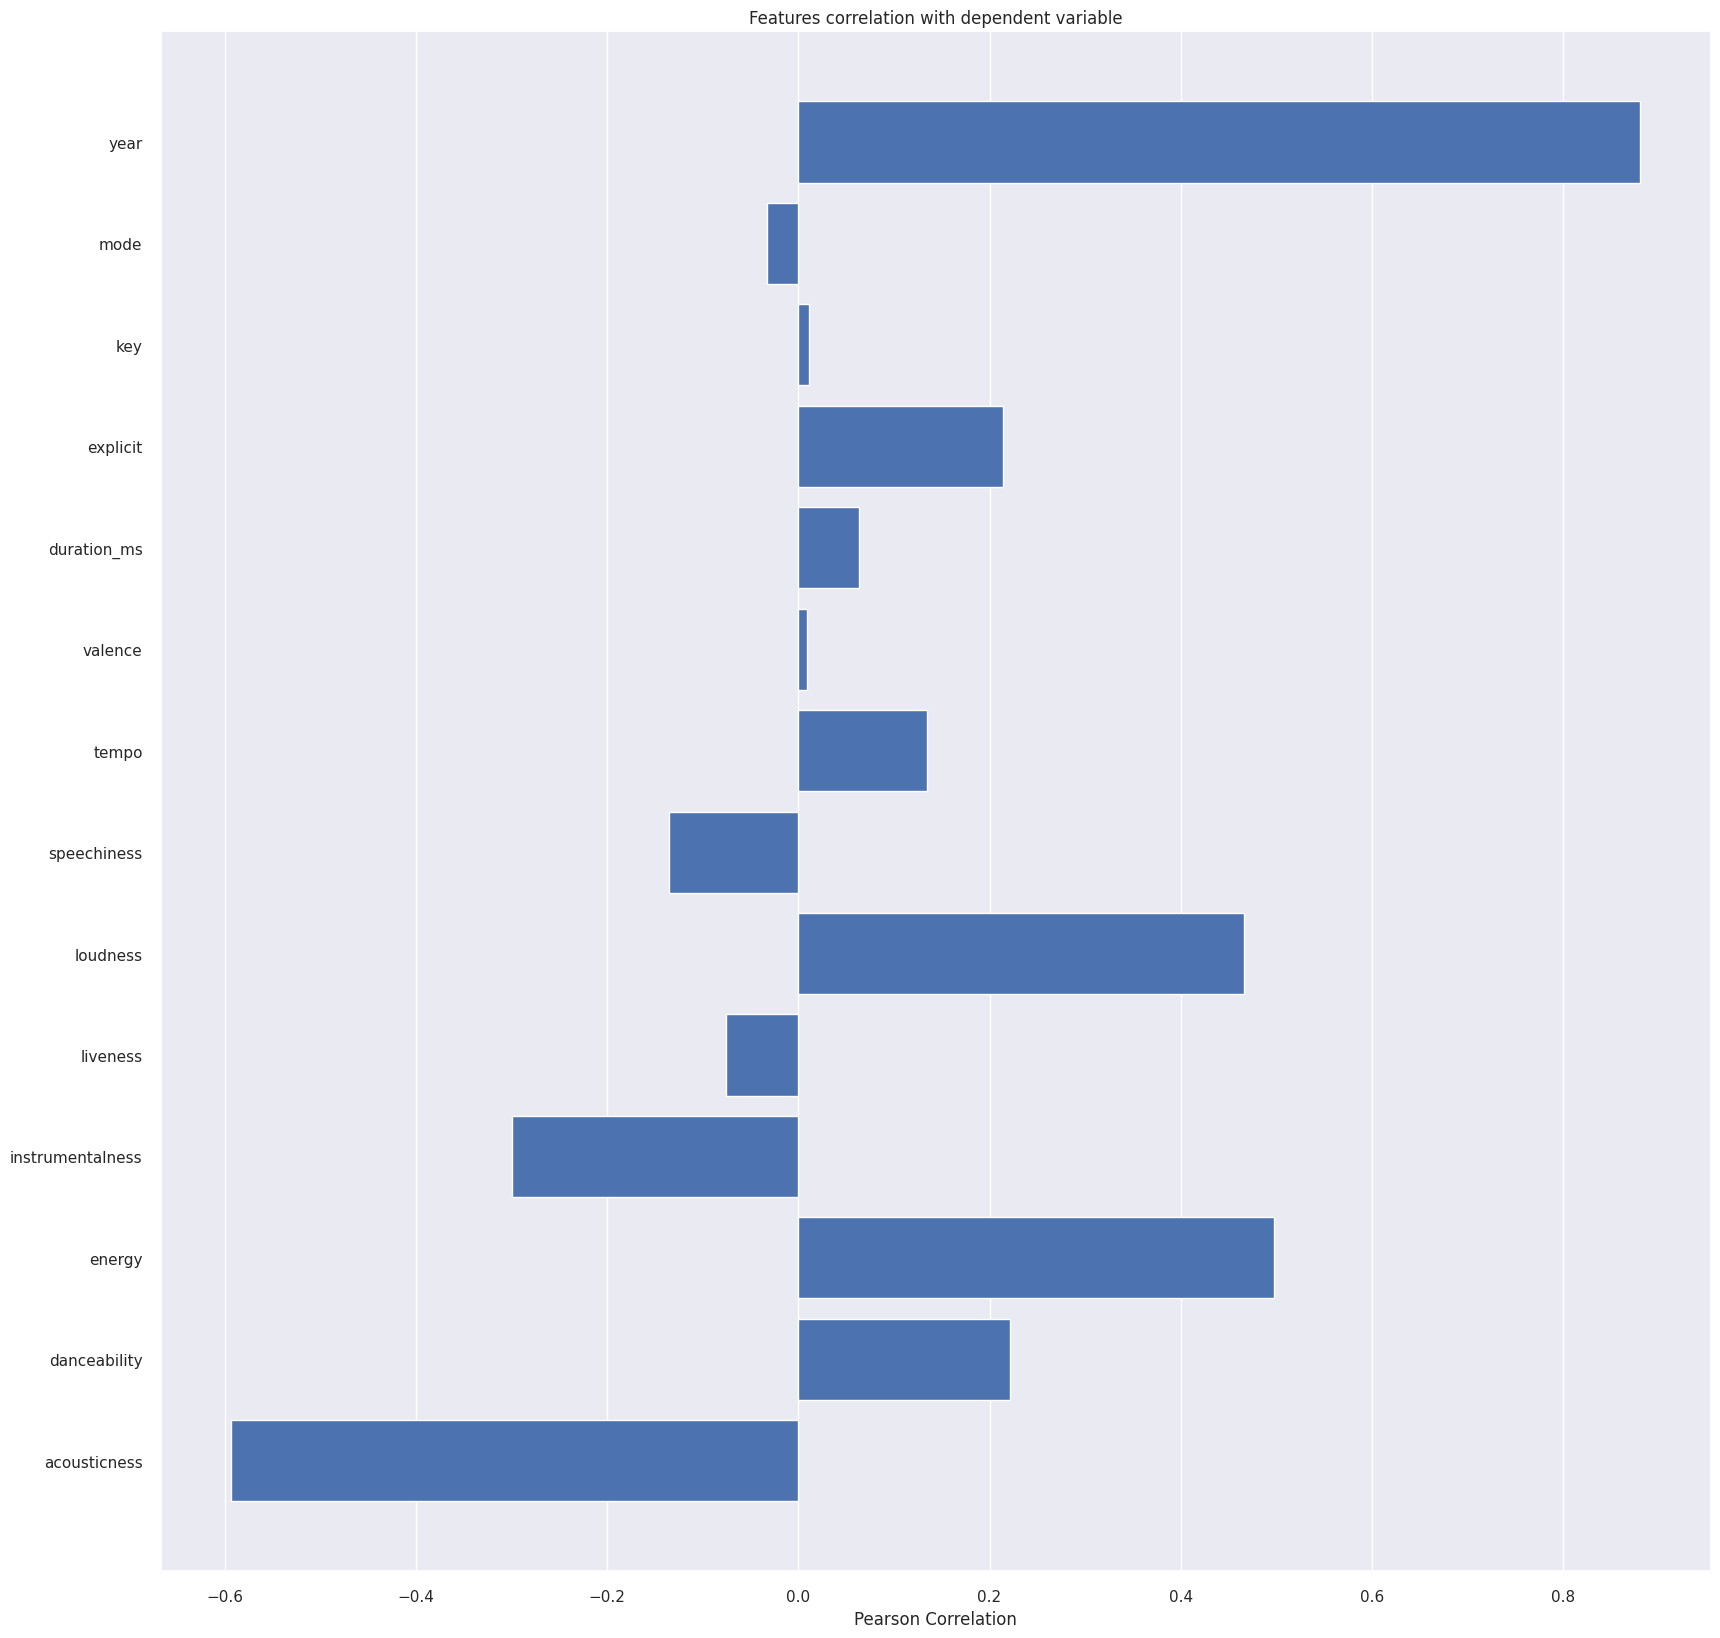

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [27]:


feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

## Timeseries

In [35]:
numeric_features = df.select_dtypes(np.number)

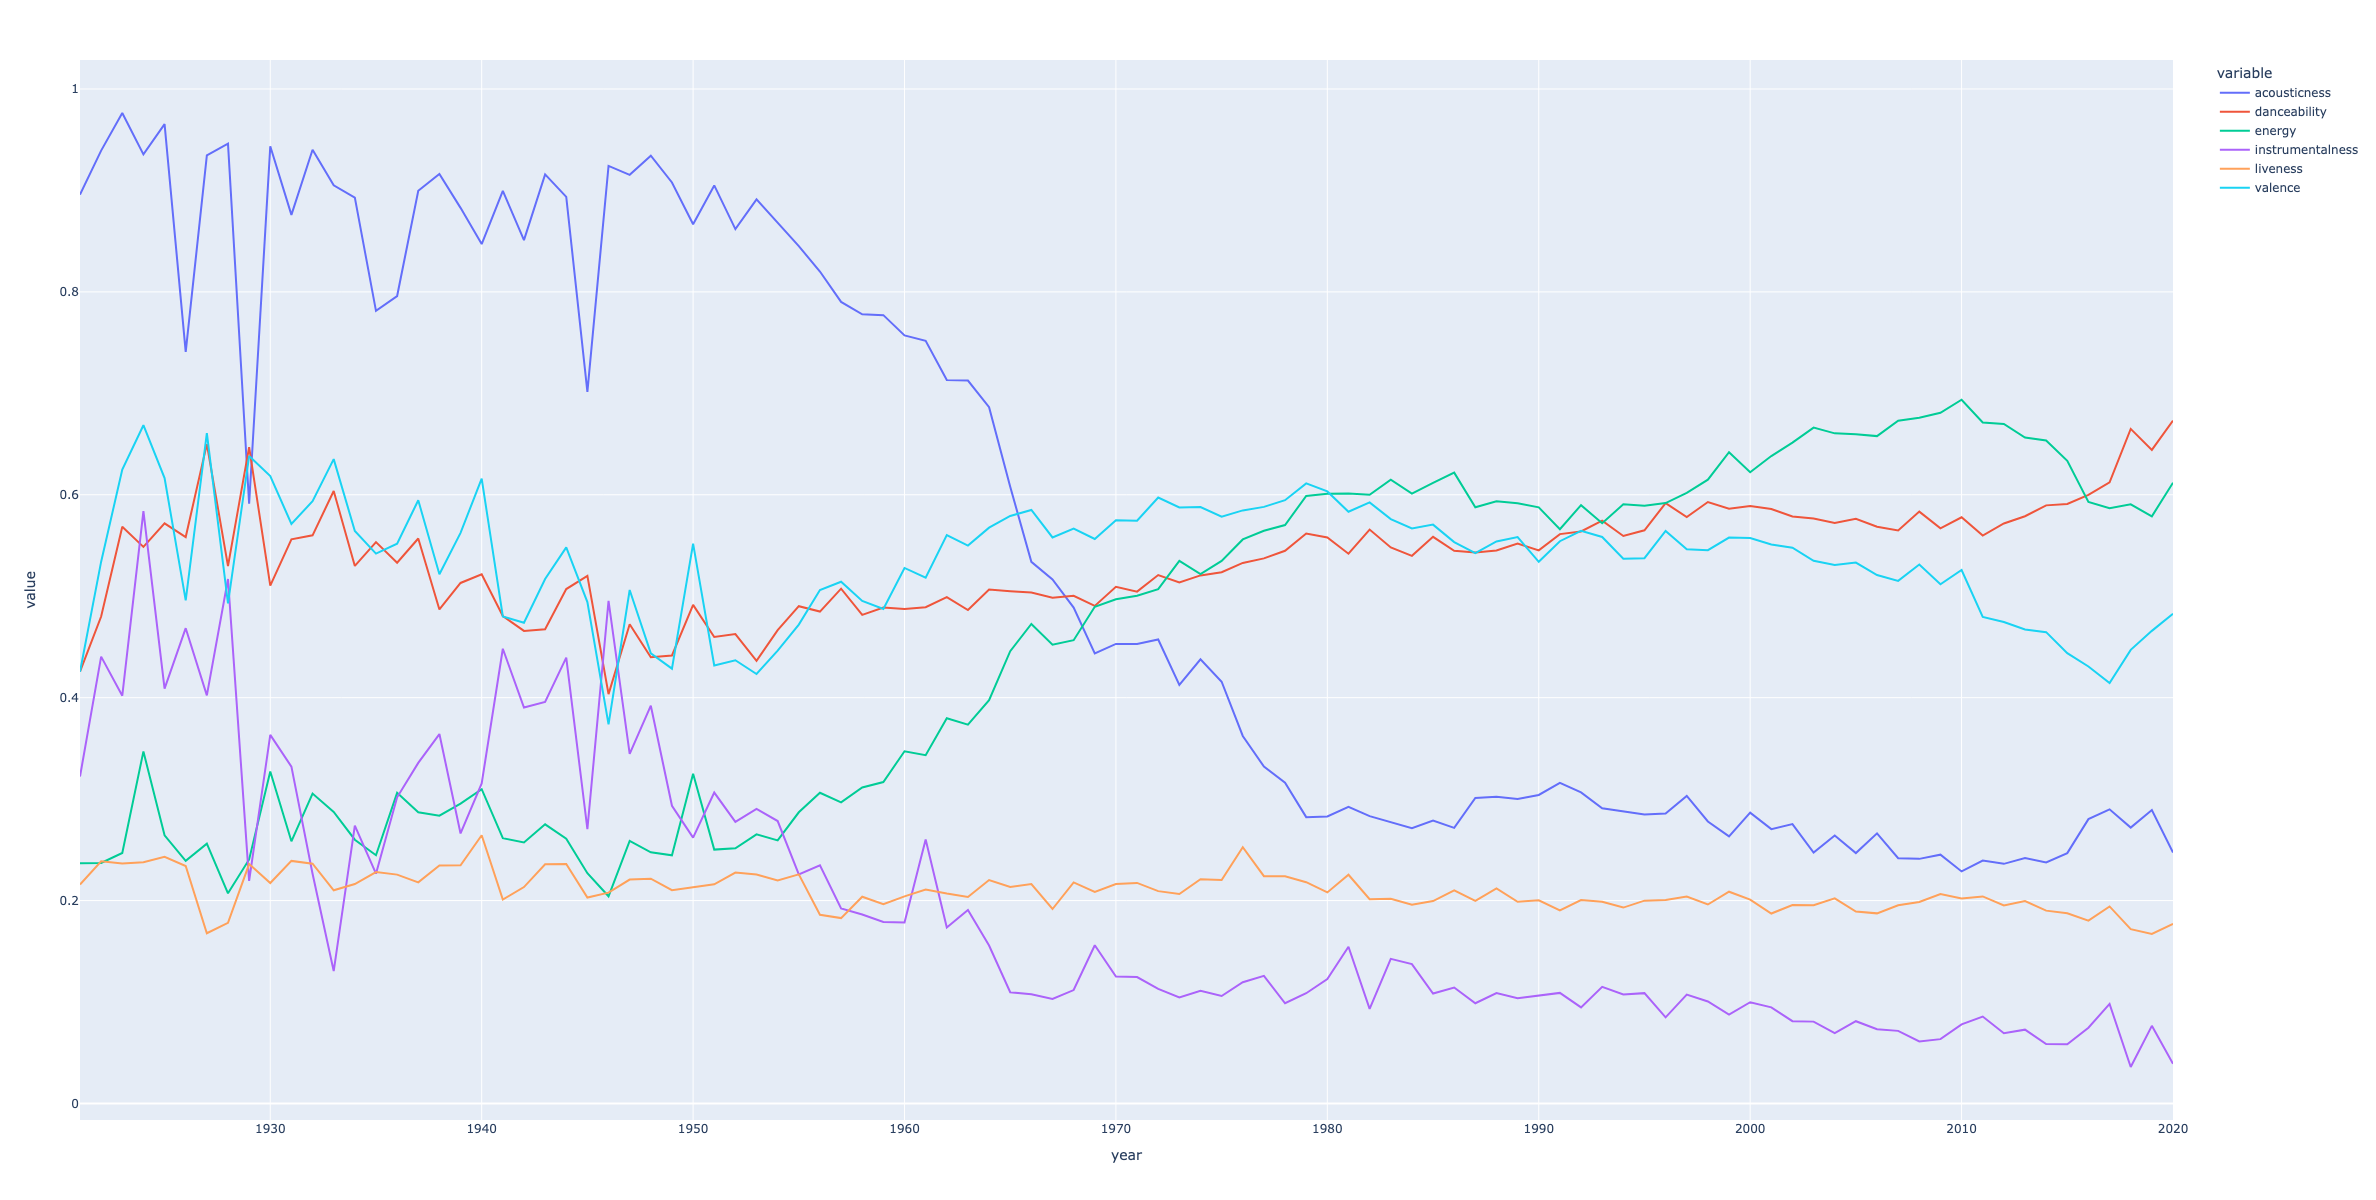

In [36]:
features_by_year = numeric_features.groupby("year", as_index=False).mean()
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

fig = px.line(features_by_year, x='year', y=sound_features, height=1200, width=2400)
fig.show()